In [ ]:
#pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [ ]:
import cv2
import numpy as np
import os
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import LSTM, Dense , Dropout
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping


# FOR create files and folders for data saving
# File path for exported data
DATA_PATH = os.path.join('Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'yes', 'no', 'please'])

# Fifty videos
no_sequences = 50

# 30 frames per video
sequence_length = 30







In [108]:
label_map = {label:num for num, label in enumerate(actions)}

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


x = np.array(sequences)

y = to_categorical(labels).astype(int) #use One-Hot Encoding method to represent y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

# model 1 success
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

# history = model.fit(x_train, y_train, epochs=500,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

model.load_weights('model1.h5')

# print(model.summary)

# y_predic = model.predict(x_test)
# y_predic = np.argmax(y_predic, axis=1)
# ytrue = np.argmax(y_test, axis=1)

# print(classification_report(ytrue, y_predic))

<bound method Model.summary of <Sequential name=sequential_14, built=True>>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
[1 0 3 3 1 0 4 4 4 2 1 4 3]
[1 0 3 3 1 3 4 4 4 2 1 4 3]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         4

    accuracy                           0.92        13
   macro avg       0.95      0.90      0.90        13
weighted avg       0.94      0.92      0.92        13



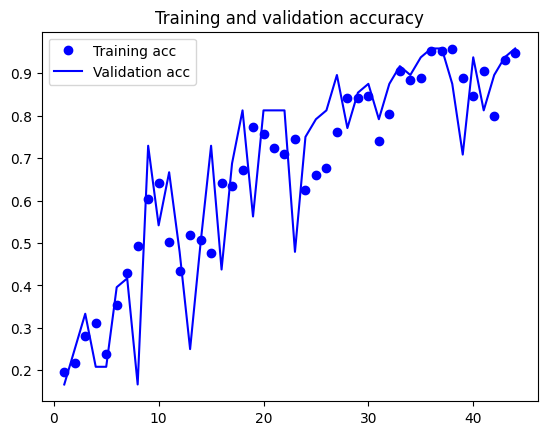

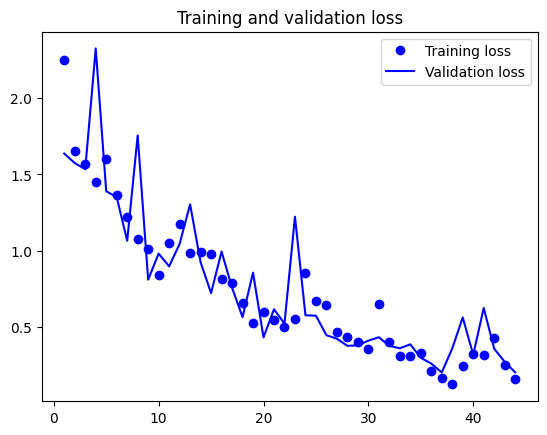

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
model.save('model1.h5')

In [63]:
y_predic = model.predict(x_test)
y_predic = np.argmax(y_predic, axis=1)
ytrue = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [70]:
import seaborn as sns
import pandas as pd
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot2(ytrue, y_predic):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}'for label in labels]
    indices = [f'Actual {label}'for label in labels]
    table = pd.DataFrame(confusion_matrix(ytrue, y_predic), columns=column, index= indices )
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

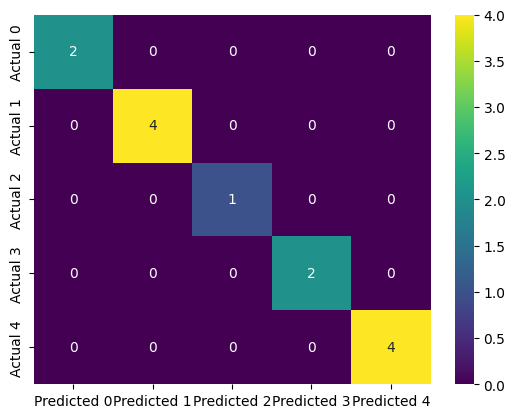

In [71]:
plot2(ytrue, y_predic)

In [114]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model.load_weights('model1.h5')

C:\Users\LIM CHEE LEONG\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:
yhat = model.predict(x_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

multilabel_confusion_matrix(ytrue,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[[11,  0],
        [ 1,  1]],

       [[10,  0],
        [ 0,  3]],

       [[12,  0],
        [ 0,  1]],

       [[ 9,  1],
        [ 0,  3]],

       [[ 9,  0],
        [ 0,  4]]], dtype=int64)

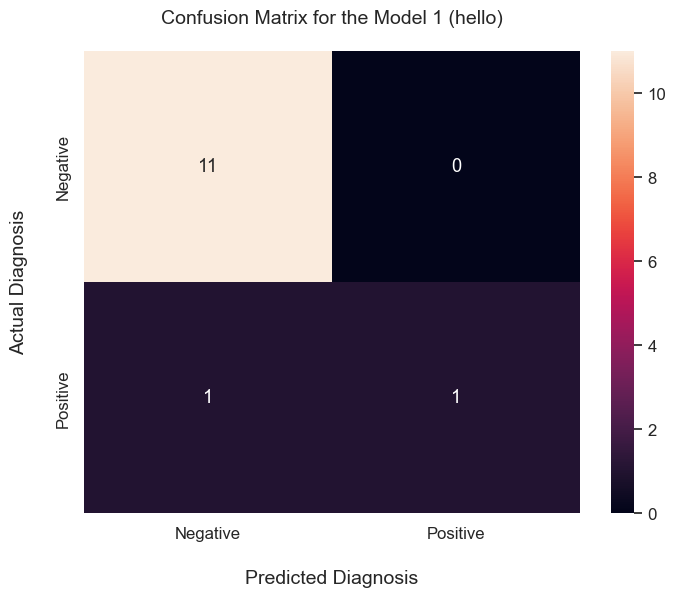

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[0], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 1 (hello)", fontsize=14, pad=20)
 
plt.show()

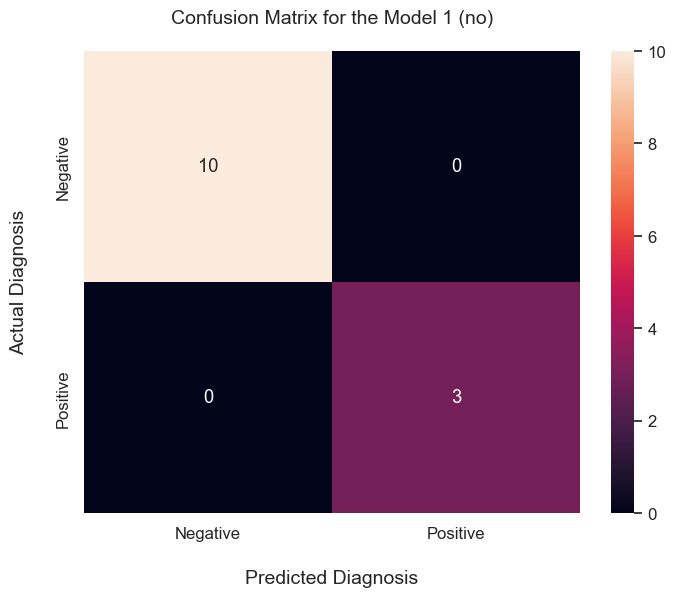

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[1], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 1 (no)", fontsize=14, pad=20)
 
plt.show()

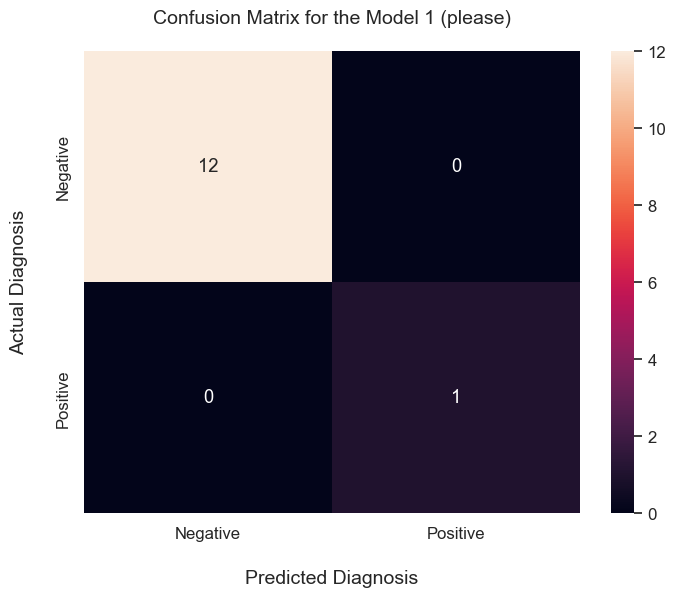

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[2], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 1 (please)", fontsize=14, pad=20)
 
plt.show()

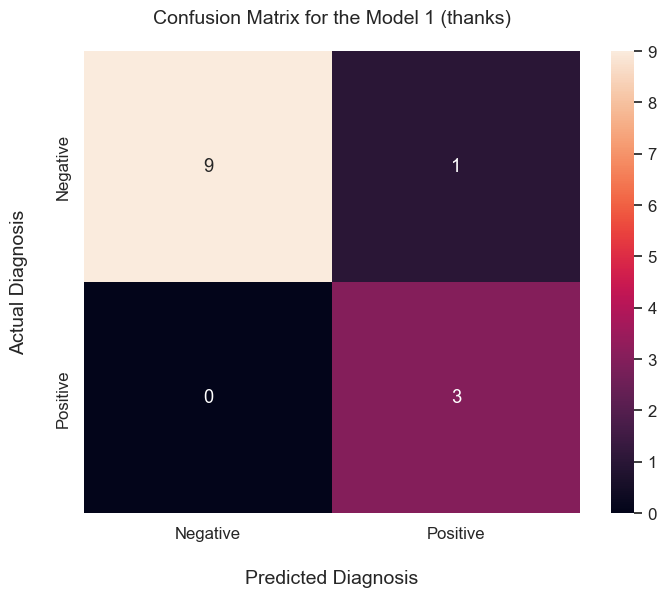

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[3], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 1 (thanks)", fontsize=14, pad=20)
 
plt.show()

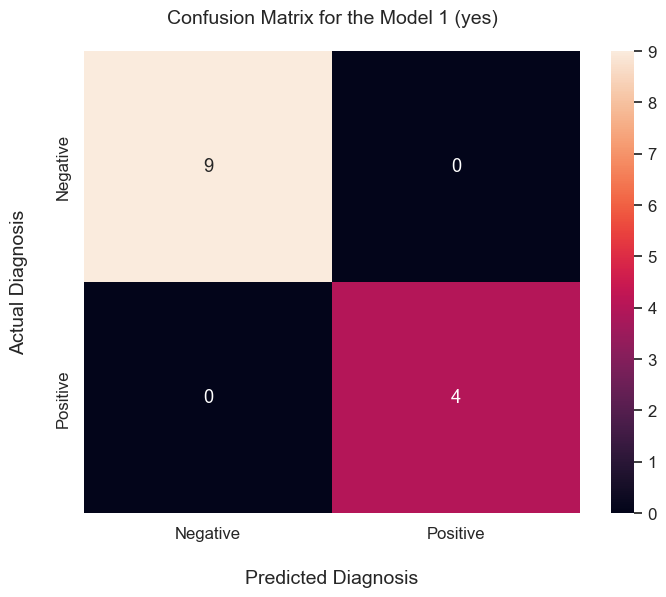

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[4], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 1 (yes)", fontsize=14, pad=20)
 
plt.show()